# Escrow Inclusion Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an escrow inclusion sweep run that compares two parameter sets. 

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../../')


import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Load Simulation Data

In [2]:
sim_df = pd.read_pickle(
    "../data/simulations/reward_split_sweep-2024-01-02_10-17-33.pkl.gz"
)

In [3]:
sim_df.head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,total_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,block_time_in_seconds,max_credit_supply
0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,1.320000e+09,...,1,0,NaN,NaN,NaN,default-issuance-function,standard,1,6,3000000000
14,1,14400.0,13.698630,13.698630,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,1,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
28,2,28800.0,27.363014,27.363014,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,2,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
42,3,43200.0,41.319709,41.319777,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,3,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000
56,4,57600.0,55.718919,55.719222,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,...,1,4,1.0,14400.0,1.000000e+10,default-issuance-function,standard,1,6,3000000000


In [4]:
sim_df.groupby(['run', 'label', 'environmental_label']).size().reset_index(name='Counts')

,run,label,environmental_label,Counts
0,1,default-issuance-function,standard,1097
1,2,alternate-split,standard,1097


## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

In [5]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

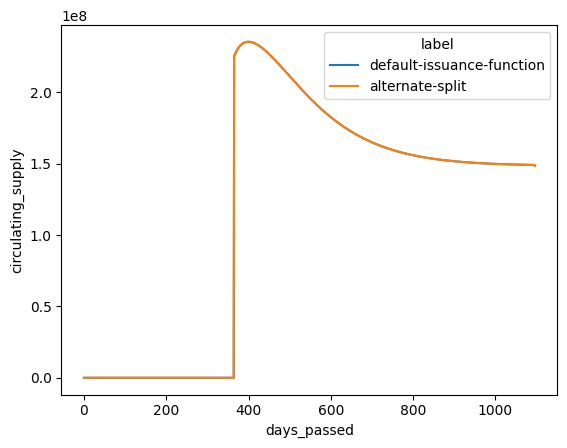

In [6]:
sns.lineplot(sim_df, x='days_passed', y='circulating_supply', hue='label')

<Axes: xlabel='days_passed', ylabel='operator_pool_shares'>

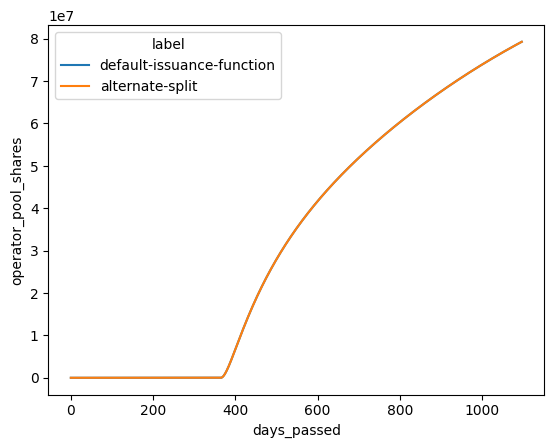

In [7]:
sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares', hue='label')

<Axes: xlabel='days_passed', ylabel='nominator_pool_shares'>

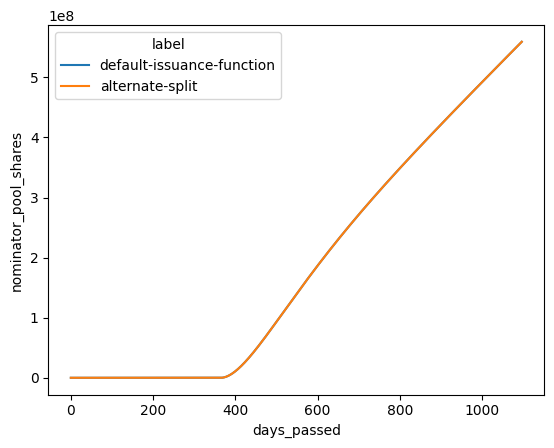

In [8]:
sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares', hue='label')

<Axes: xlabel='days_passed', ylabel='block_utilization'>

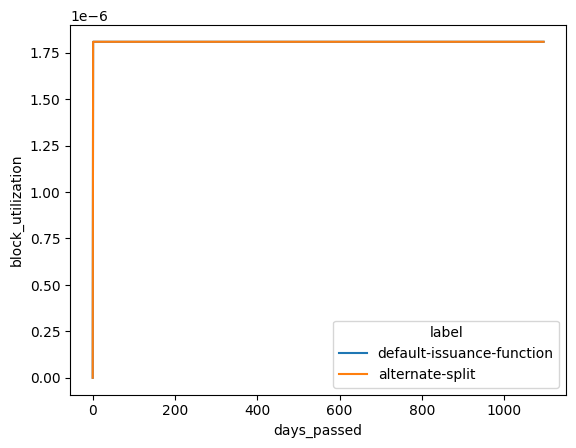

In [9]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization', hue='label')


2024-01-30 16:36:58 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


<Axes: xlabel='days_passed', ylabel='circulating_supply'>

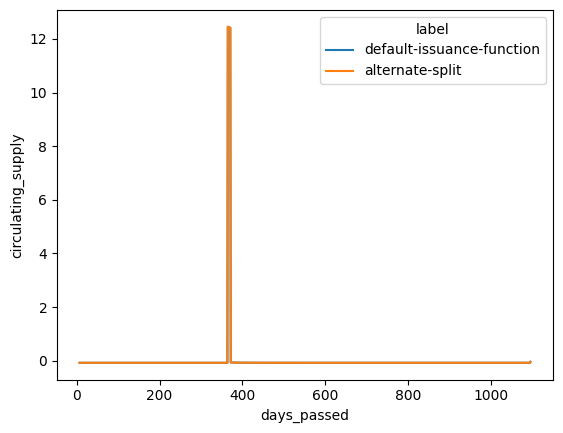

In [10]:
from subspace_model.experiments.metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply', hue='label')